<a href="https://colab.research.google.com/github/risshabhraj/upper_confidence_bond/blob/main/upper_confidence_bond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Data

In [2]:
df=pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing UCB

In [3]:
import math
N=10000
d=10
ads_selected=[]
number_of_selections=[0]*d
sum_of_rewards=[0]*d
total_rewards=0
for n in range(0, N):
  ad=0
  max_upper_bound=0
  for i in range (0, d):
    if (number_of_selections[i]>0):
      average_rewards=sum_of_rewards[i]/number_of_selections[i]
      delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
      ucb=average_rewards+delta_i
    else:
      ucb=1e400
    if (ucb>max_upper_bound):
      max_upper_bound=ucb
      ad=i
  ads_selected.append(ad)
  number_of_selections[ad]+=1
  reward=df.values[n, ad]
  sum_of_rewards[ad]+=reward
  total_rewards+=reward

Visualising the result

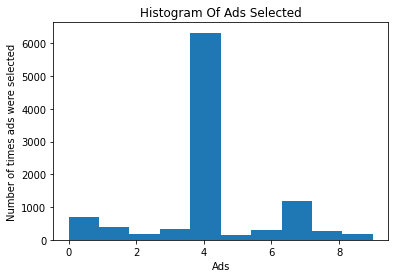

In [4]:
plt.hist(ads_selected)
plt.title('Histogram Of Ads Selected')
plt.xlabel('Ads')
plt.ylabel('Number of times ads were selected')
plt.show()